## Ridge and LAsso Regression implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ; sns.set()

In [2]:
#pd.set_option("display.max_columns.")

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Aim:-  The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted

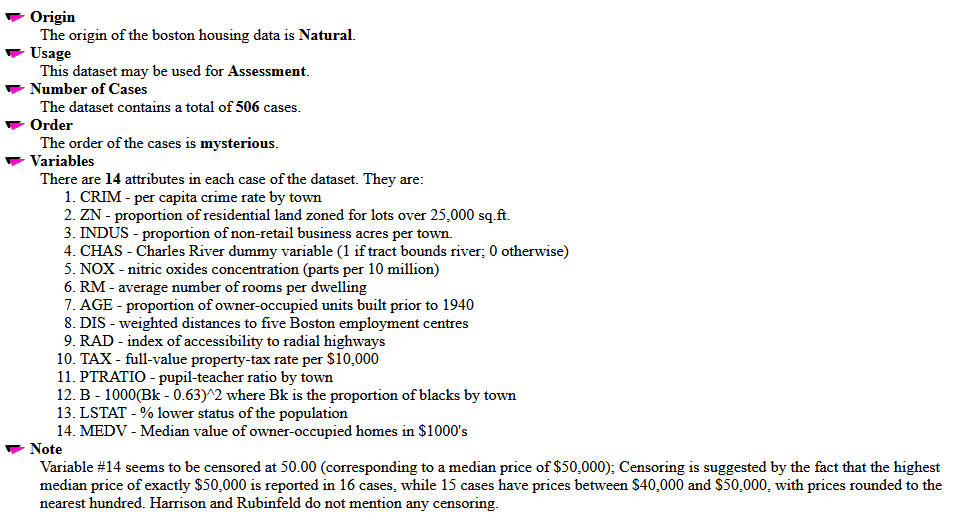

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# check null 
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
# All feature is of numericl feature.
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

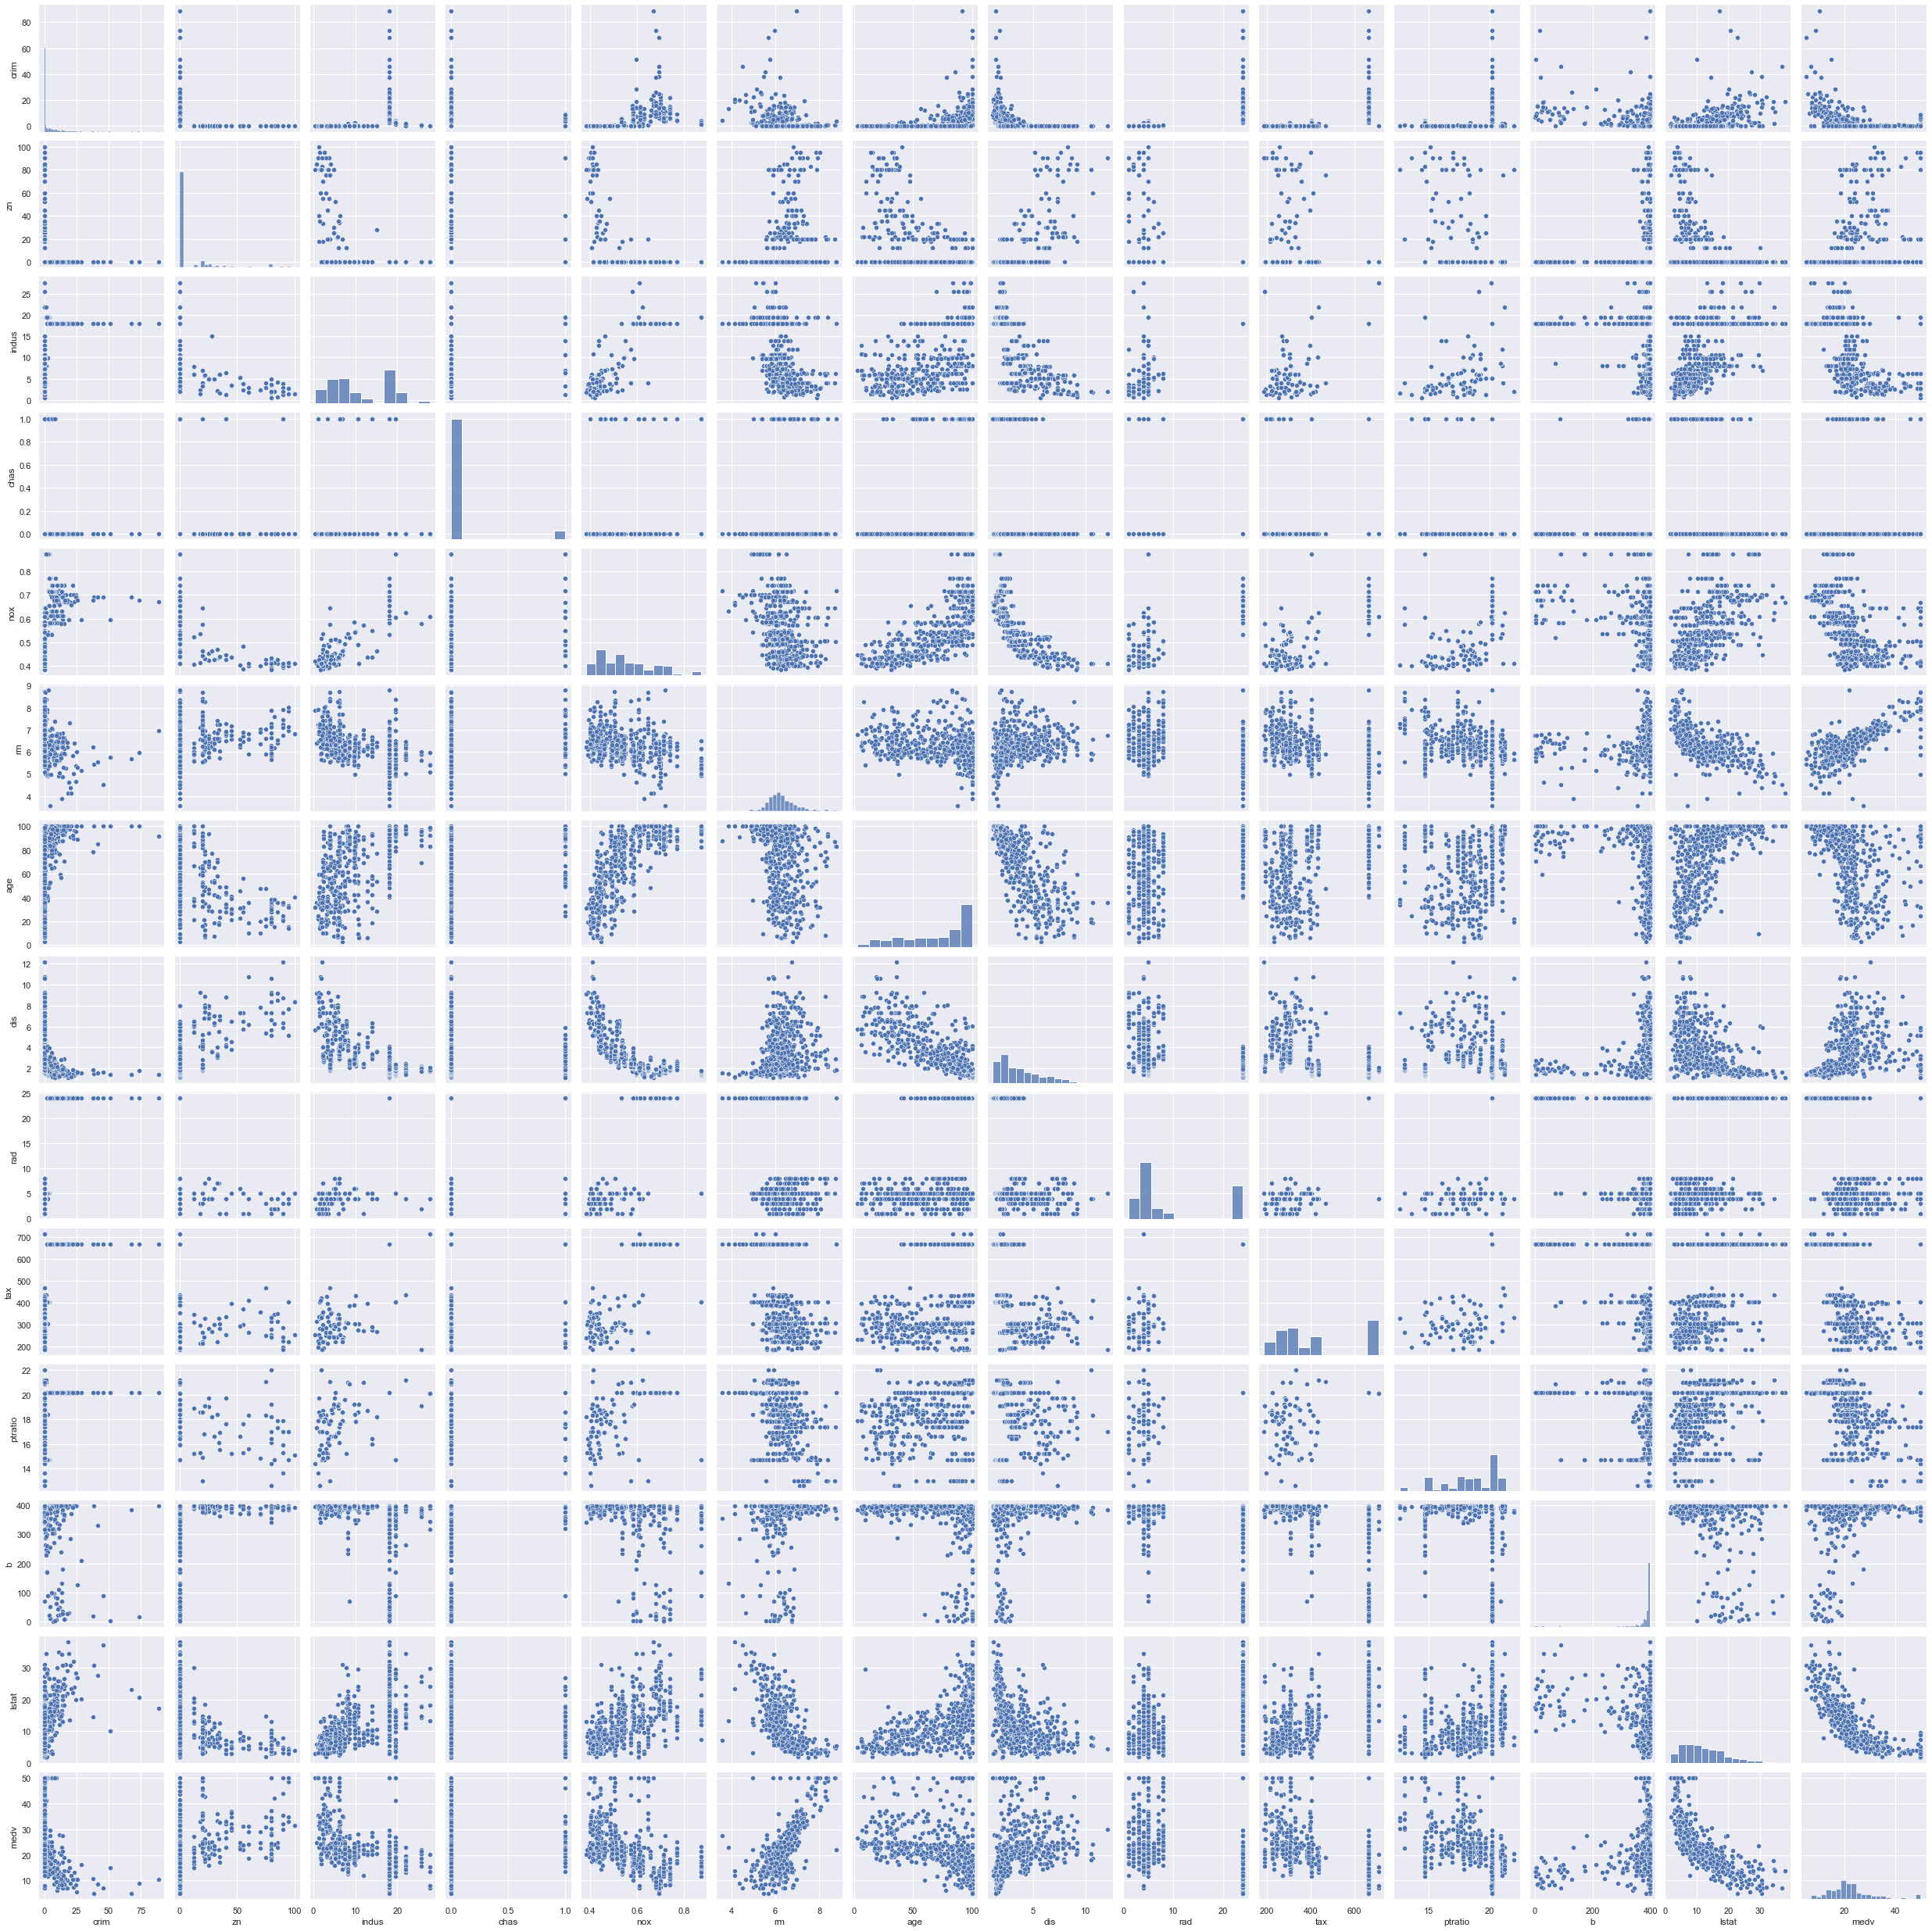

In [7]:
sns.pairplot(df)

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


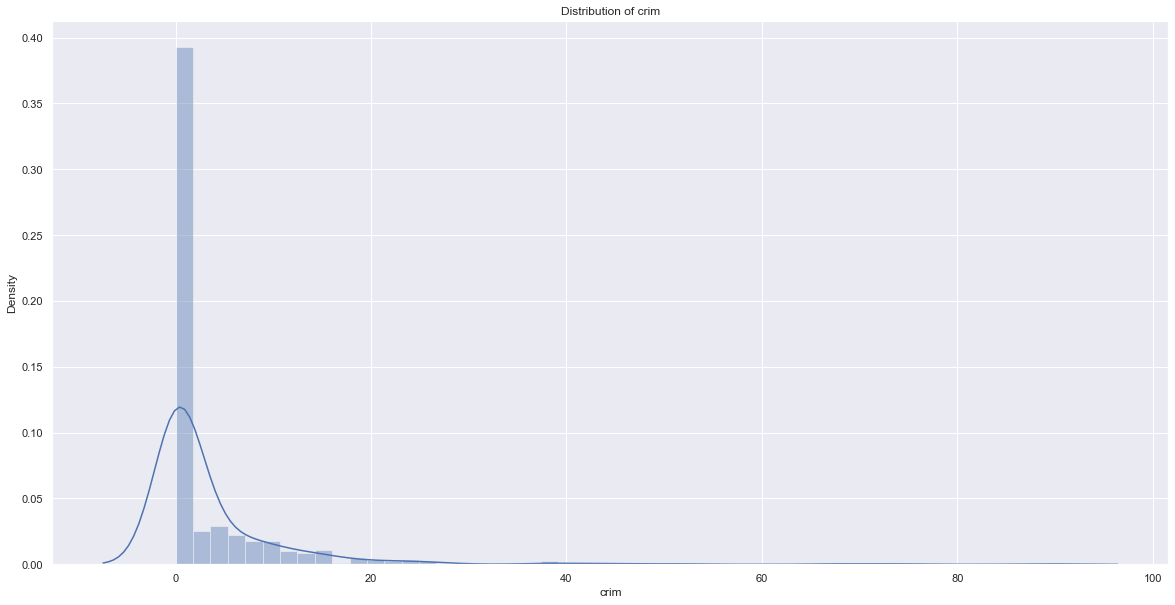

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


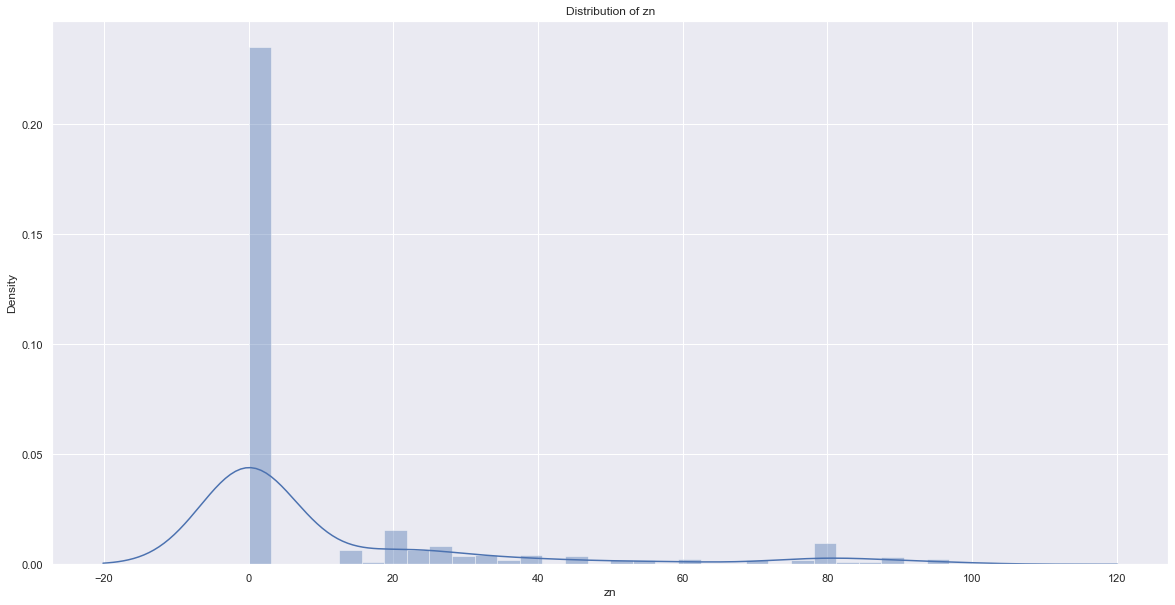

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


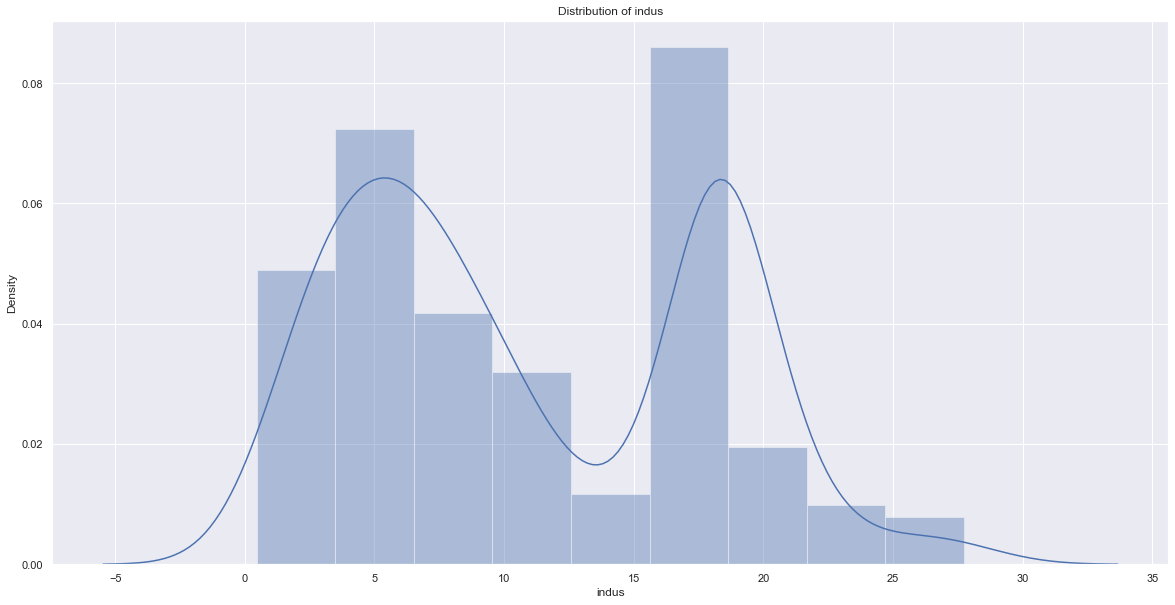

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


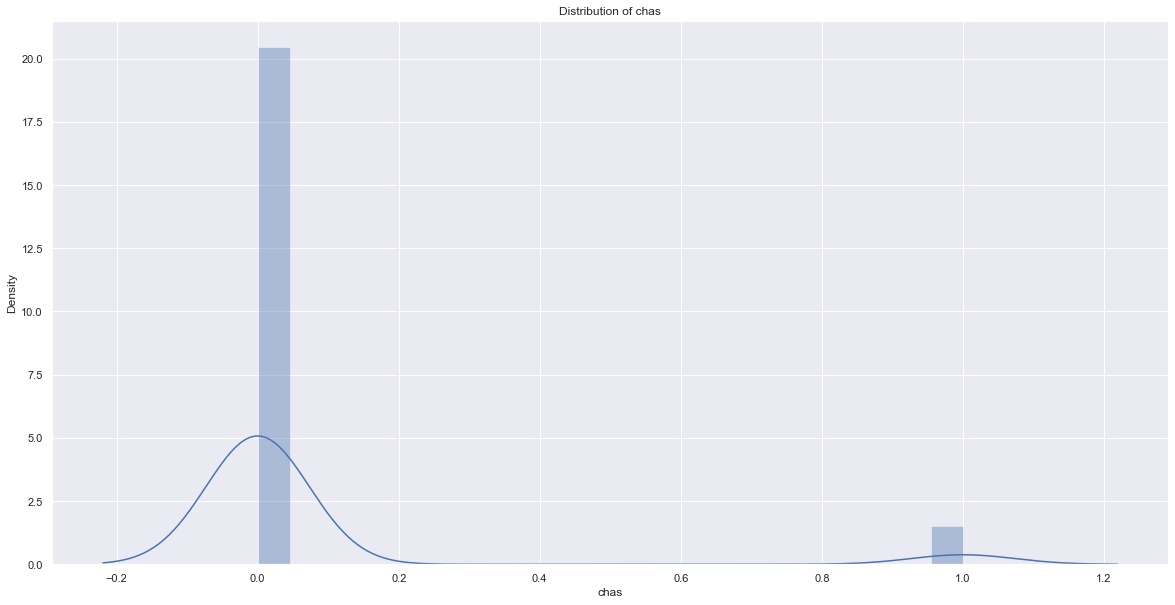

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


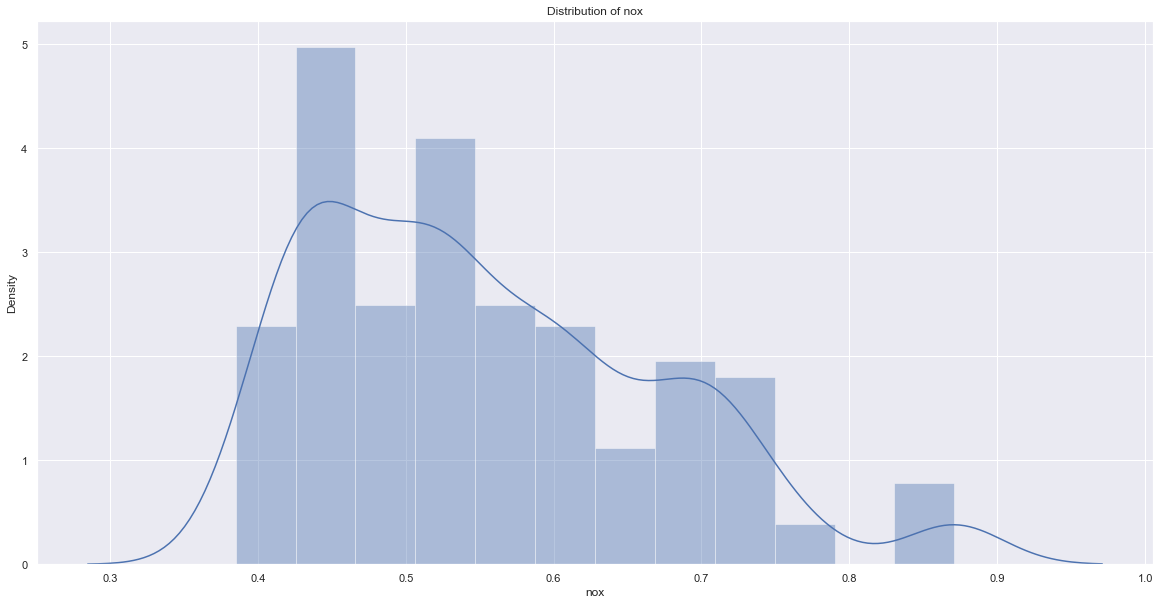

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


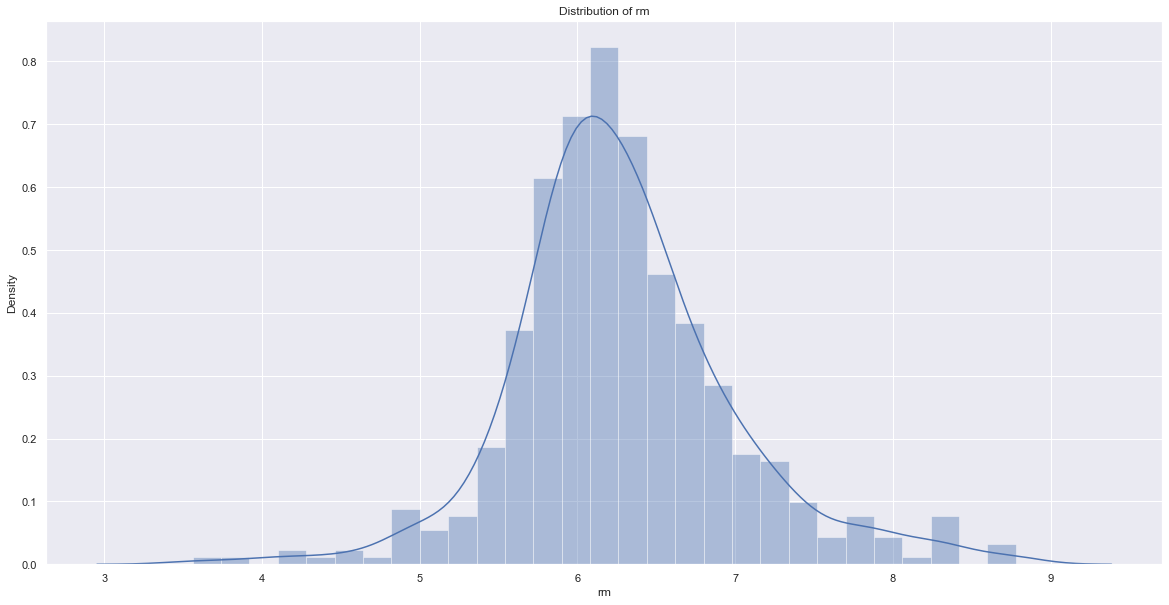

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


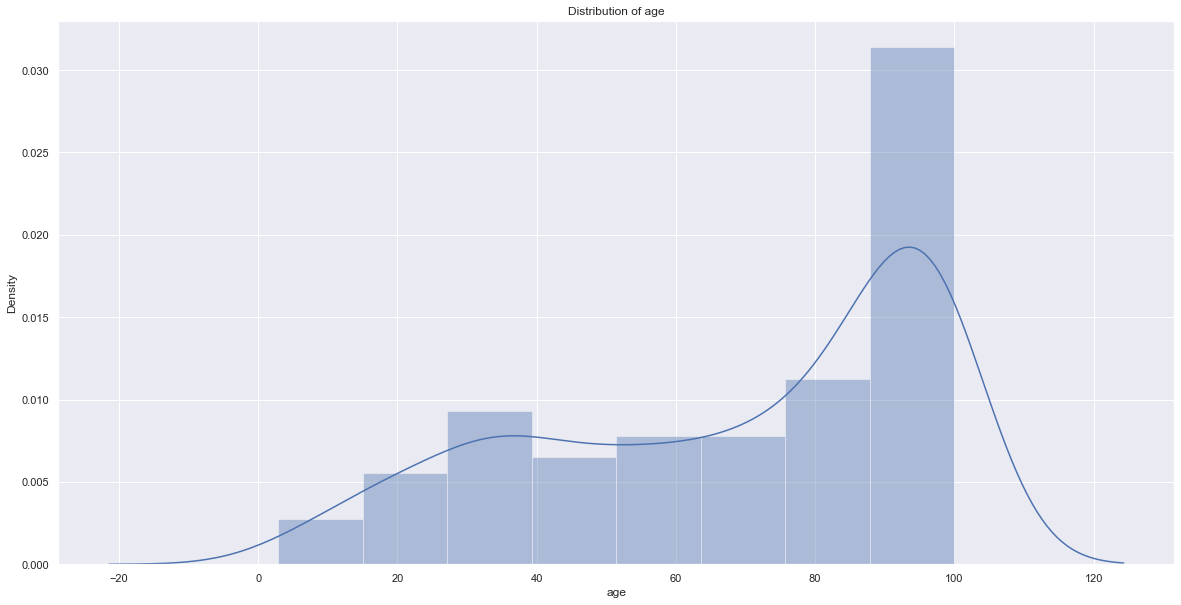

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


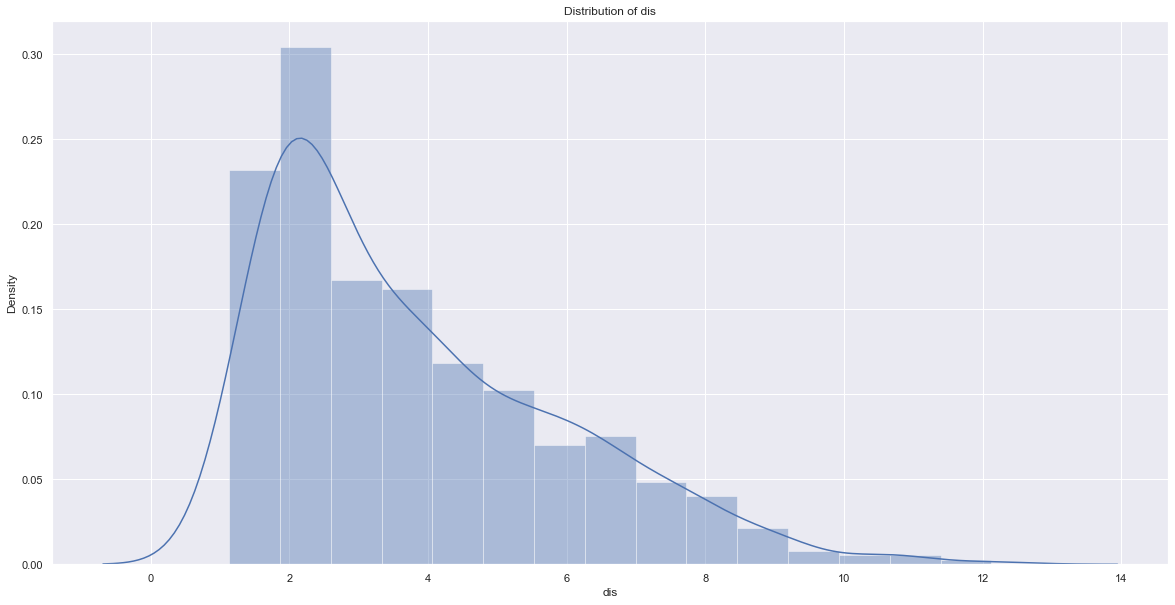

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


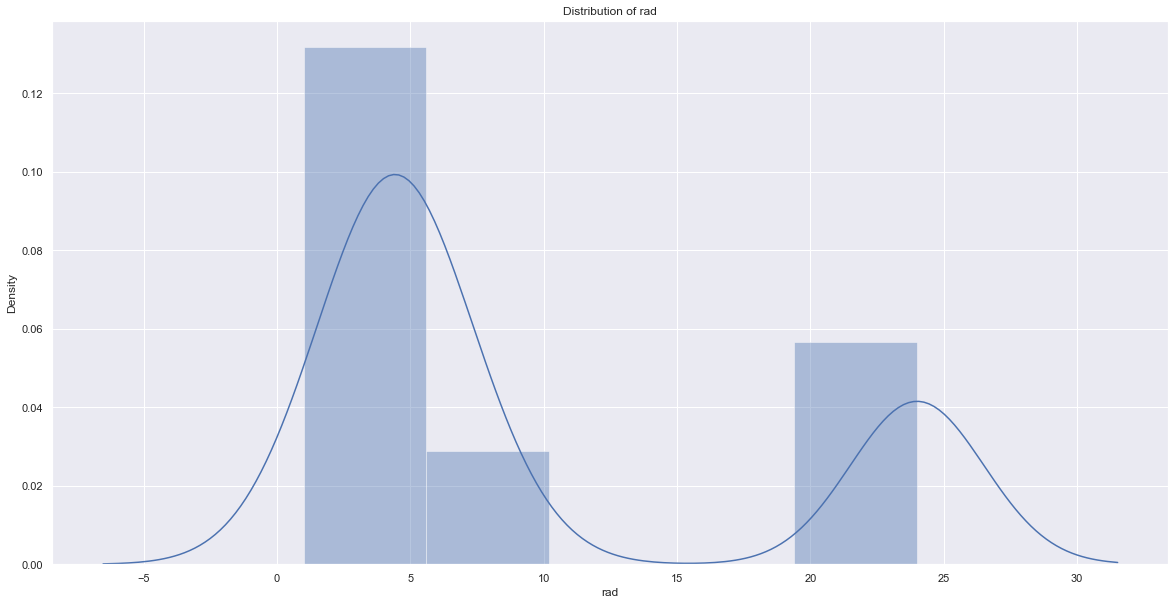

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


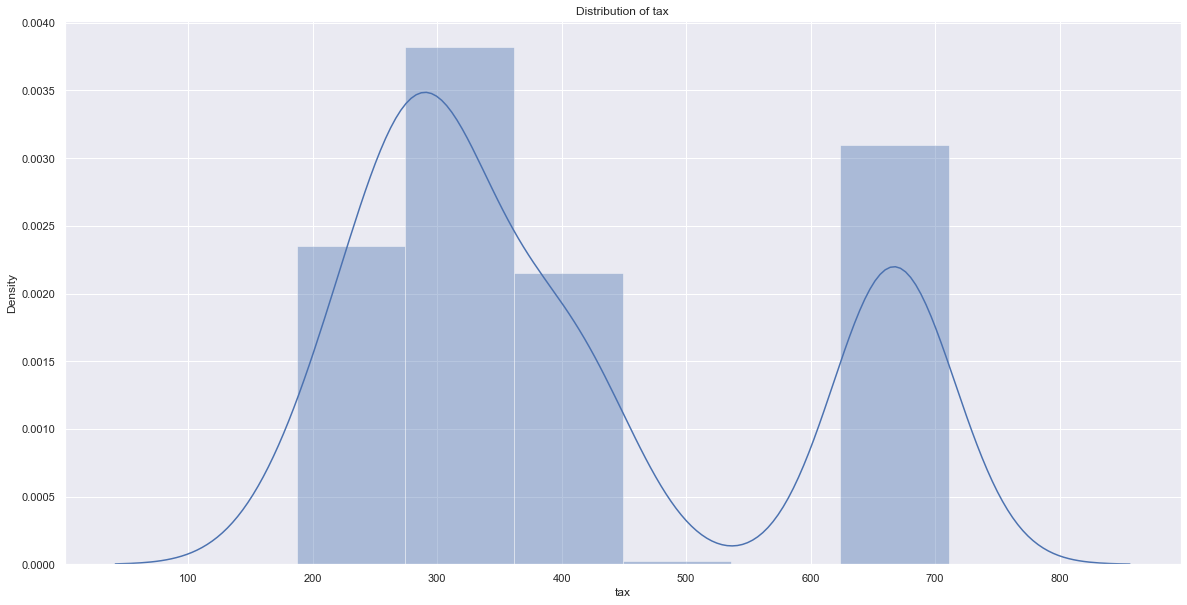

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


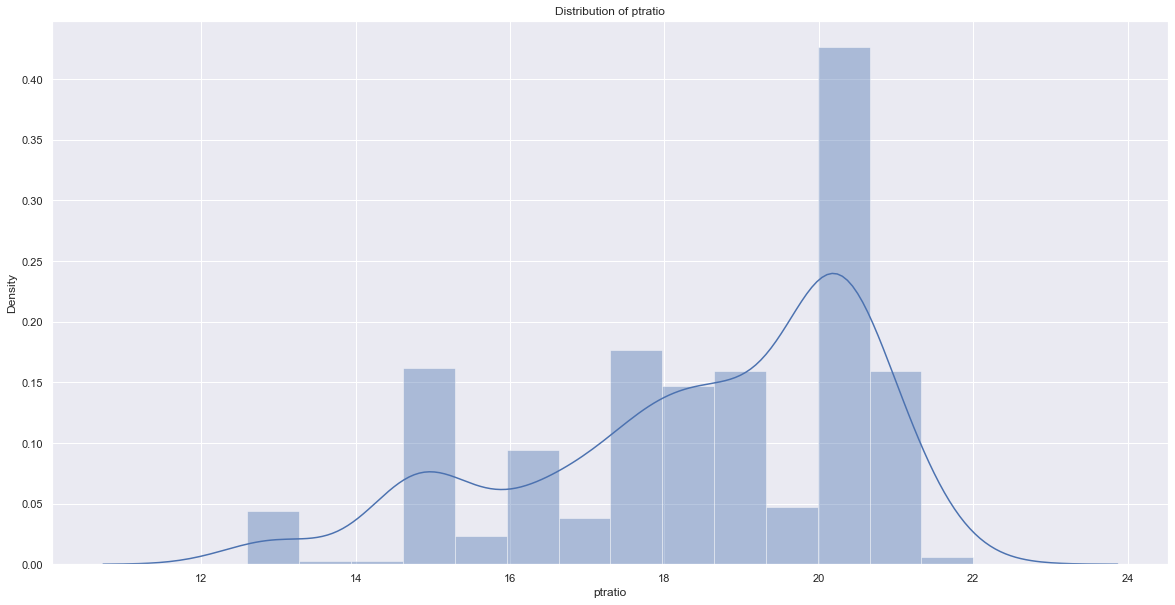

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


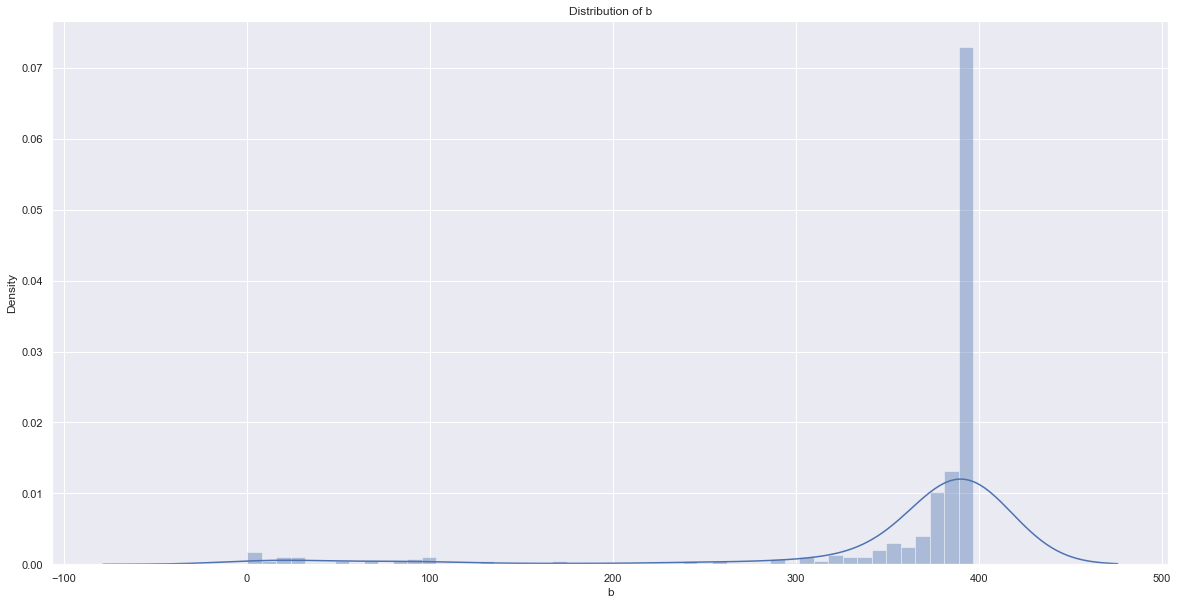

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


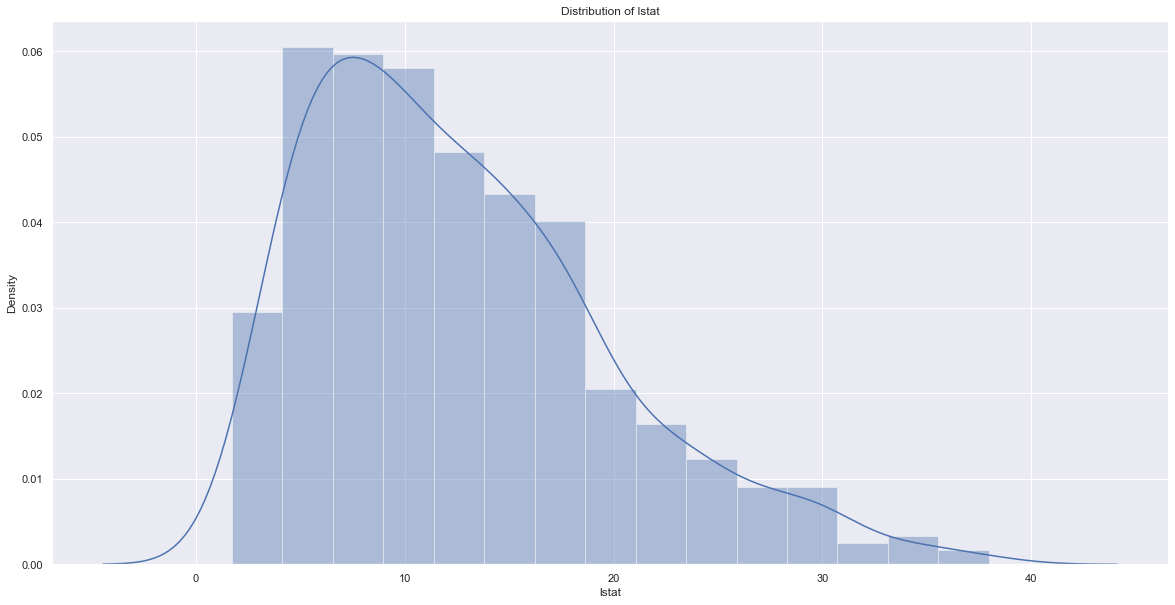

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


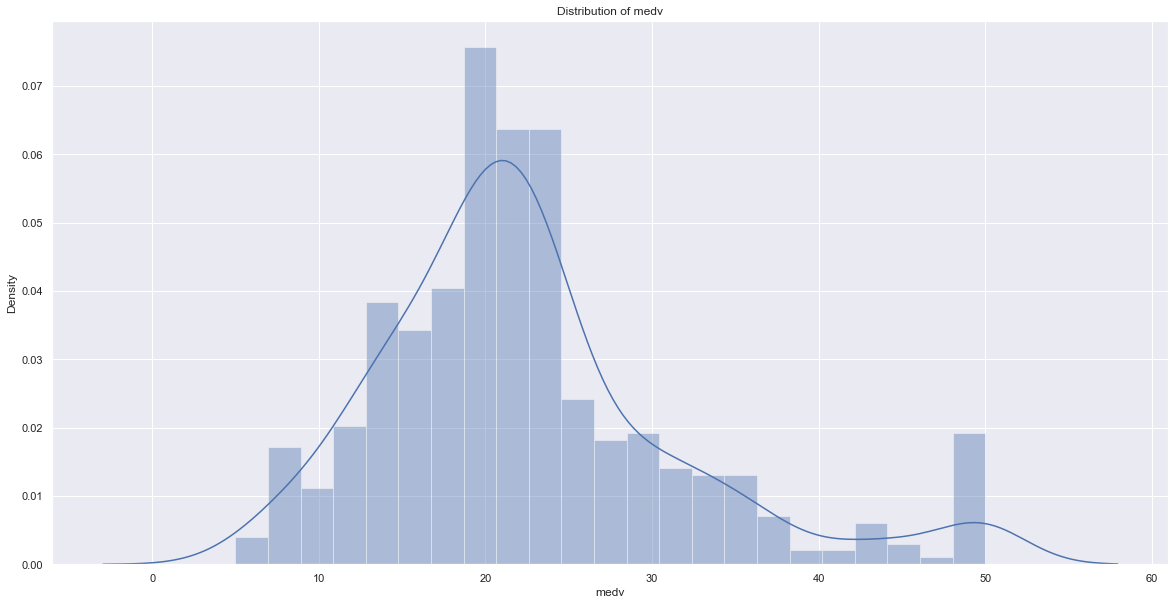

In [8]:
for feature in df.columns:
    plt.figure(figsize=(20,10))
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.title(f'Distribution of {feature}')
    plt.show()
    

In [9]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot: >

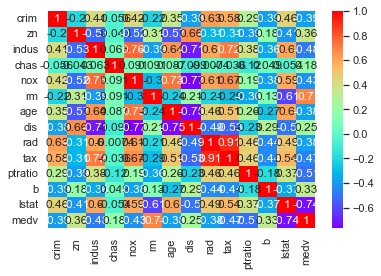

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

In [11]:
# Objectibe a perform a feature selection technique.

This is a regression problem so regression technique for feaure selection are 

Types of Feature Selection Methods in ML

1. Filter Methods
2. Wrapper Methods
3. Embedded Methods

Filter Methods:- 
1. chisquare
2. correlation method we will study this two method.

 ## chisquare
In feature selection, we aim to select the features which are highly dependent on the response.

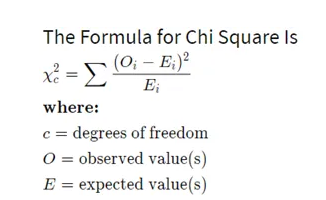

When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [12]:
# split the data in to x and y

In [13]:
X = df.drop('medv',axis=1)
y = df["medv"]

In [14]:
X.shape ,y.shape

((506, 13), (506,))

In [20]:
chi_scores = chi2(X,y)

ValueError: Unknown label type: (0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64,)

In [16]:
from sklearn.feature_selection import chi2

from sklearn.feature_selection import SelectKBest

In [18]:
# Applying feature selection using Chi-Square technique
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

ValueError: Unknown label type: (array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21.5, 19.6, 15.3, 19.4,
       17. , 15.6, 13.1, 41.3, 24.3, 23.3, 27. , 50. , 50. , 50. , 22.7,
       25. , 50. , 23.8, 23.8, 22.3, 17.4, 19.1, 23.1, 23.6, 22.6, 29.4,
       23.2, 24.6, 29.9, 37.2, 39.8, 36.2, 37.9, 32.5, 26.4, 29.6, 50. ,
       32. , 29.8, 34.9, 37. , 30.5, 36.4, 31.1, 29.1, 50. , 33.3, 30.3,
       34.6, 34.9, 32.9, 24.1, 42.3, 48.5, 50. , 22.6, 24.4, 22.5, 24.4,
       20. , 21.7, 19.3, 22.4, 28.1, 23.7, 25. , 23.3, 28.7, 21.5, 23. ,
       26.7, 21.7, 27.5, 30.1, 44.8, 50. , 37.6, 31.6, 46.7, 31.5, 24.3,
       31.7, 41.7, 48.3, 29. , 24. , 25.1, 31.5, 23.7, 23.3, 22. , 20.1,
       22.2, 23.7, 17.6, 18.5, 24.3, 20.5, 24.5, 26.2, 24.4, 24.8, 29.6,
       42.8, 21.9, 20.9, 44. , 50. , 36. , 30.1, 33.8, 43.1, 48.8, 31. ,
       36.5, 22.8, 30.7, 50. , 43.5, 20.7, 21.1, 25.2, 24.4, 35.2, 32.4,
       32. , 33.2, 33.1, 29.1, 35.1, 45.4, 35.4, 46. , 50. , 32.2, 22. ,
       20.1, 23.2, 22.3, 24.8, 28.5, 37.3, 27.9, 23.9, 21.7, 28.6, 27.1,
       20.3, 22.5, 29. , 24.8, 22. , 26.4, 33.1, 36.1, 28.4, 33.4, 28.2,
       22.8, 20.3, 16.1, 22.1, 19.4, 21.6, 23.8, 16.2, 17.8, 19.8, 23.1,
       21. , 23.8, 23.1, 20.4, 18.5, 25. , 24.6, 23. , 22.2, 19.3, 22.6,
       19.8, 17.1, 19.4, 22.2, 20.7, 21.1, 19.5, 18.5, 20.6, 19. , 18.7,
       32.7, 16.5, 23.9, 31.2, 17.5, 17.2, 23.1, 24.5, 26.6, 22.9, 24.1,
       18.6, 30.1, 18.2, 20.6, 17.8, 21.7, 22.7, 22.6, 25. , 19.9, 20.8,
       16.8, 21.9, 27.5, 21.9, 23.1, 50. , 50. , 50. , 50. , 50. , 13.8,
       13.8, 15. , 13.9, 13.3, 13.1, 10.2, 10.4, 10.9, 11.3, 12.3,  8.8,
        7.2, 10.5,  7.4, 10.2, 11.5, 15.1, 23.2,  9.7, 13.8, 12.7, 13.1,
       12.5,  8.5,  5. ,  6.3,  5.6,  7.2, 12.1,  8.3,  8.5,  5. , 11.9,
       27.9, 17.2, 27.5, 15. , 17.2, 17.9, 16.3,  7. ,  7.2,  7.5, 10.4,
        8.8,  8.4, 16.7, 14.2, 20.8, 13.4, 11.7,  8.3, 10.2, 10.9, 11. ,
        9.5, 14.5, 14.1, 16.1, 14.3, 11.7, 13.4,  9.6,  8.7,  8.4, 12.8,
       10.5, 17.1, 18.4, 15.4, 10.8, 11.8, 14.9, 12.6, 14.1, 13. , 13.4,
       15.2, 16.1, 17.8, 14.9, 14.1, 12.7, 13.5, 14.9, 20. , 16.4, 17.7,
       19.5, 20.2, 21.4, 19.9, 19. , 19.1, 19.1, 20.1, 19.9, 19.6, 23.2,
       29.8, 13.8, 13.3, 16.7, 12. , 14.6, 21.4, 23. , 23.7, 25. , 21.8,
       20.6, 21.2, 19.1, 20.6, 15.2,  7. ,  8.1, 13.6, 20.1, 21.8, 24.5,
       23.1, 19.7, 18.3, 21.2, 17.5, 16.8, 22.4, 20.6, 23.9, 22. , 11.9]),)

In [19]:
# Getting the selected feature names
selected_features = X.columns[selector.get_support(indices=True)].tolist()

# Printing the selected feature names
print("Selected Features:")

AttributeError: 'SelectKBest' object has no attribute 'scores_'

# correlation method;-

In [23]:
corr_matrix = df.corr()

In [24]:
corr_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot: >

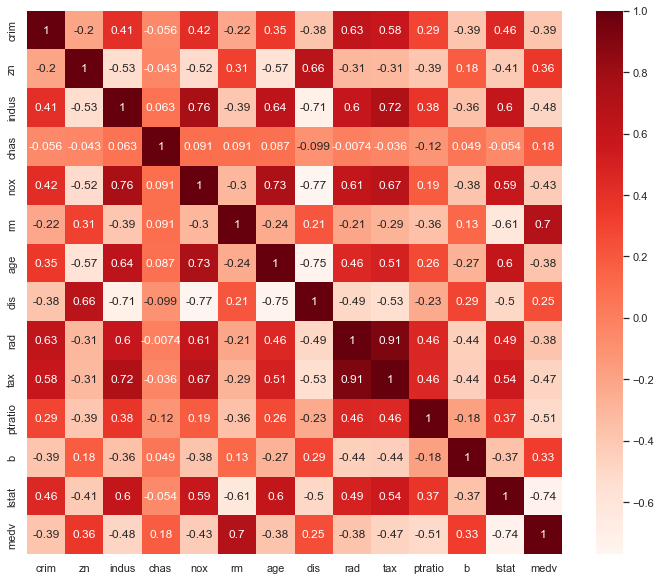

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)

In [31]:
abs(corr_matrix["medv"])

crim       0.388305
zn         0.360445
indus      0.483725
chas       0.175260
nox        0.427321
rm         0.695360
age        0.376955
dis        0.249929
rad        0.381626
tax        0.468536
ptratio    0.507787
b          0.333461
lstat      0.737663
medv       1.000000
Name: medv, dtype: float64

In [32]:
threshold = 0.5
high_corr_features = corr_matrix[abs(corr_matrix['medv']) > threshold]

In [33]:
high_corr_features # they are heighly corelated with target variable hence we will use this corelation between selected independent feature.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
ptratio,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
lstat,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000,-0.737663
medv,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.000000


In [35]:
df1 = df[["rm","ptratio","lstat"]]

In [37]:
df1.corr()

,rm,ptratio,lstat
rm,1.000000,-0.355501,-0.613808
ptratio,-0.355501,1.000000,0.374044
lstat,-0.613808,0.374044,1.000000


From the above code, it is seen that the variables RM and LSTAT are highly correlated with each other (-0.613808). Hence we would keep only one variable and drop the other. We will keep LSTAT since its correlation with MEDV is higher than that of RM.

After dropping RM, we are left with two feature, LSTAT and PTRATIO. These are the final features given by Pearson correlation.

In [39]:
X = df[["lstat",'ptratio']]# independent features
y=df['medv']# dependent features

In [ ]:
X=dataset.iloc[:,:-1] ## 
y=dataset.iloc[:,-1] ## 

## Linear Regression


In [ ]:
#  Split the data into training/testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
# Create linear regression object

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()


In [ ]:
# Train the model using the training sets

reg.fit(X_train,y_train)

In [ ]:
# Make predictions using the testing set
pred_Y=reg.predict(X_test)

In [ ]:
pred_Y.shape

In [ ]:
# The coefficients
reg.coef_

In [ ]:
# The mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,pred_Y)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

In [ ]:
# ok till here is cleare .. plot ko cleare krna hai


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

In [ ]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

In [ ]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)

In [ ]:
from sklearn.linear_model import Ridge
